# Worksheet 12

Name:  Rishab Sudhir

UID:  U64819615

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes

2. No

3. Yes

4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

split the data into a training and testing set, train the model on the training set. and test the model on the testing set.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

1. Making a model that is general to the data and isnt specific enough

2. Making a model that is too specific to the data.

### K Nearest Neighbors

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

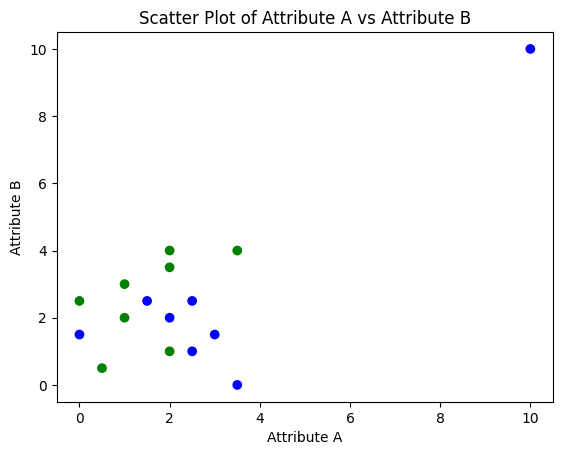

In [33]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())

plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot of Attribute A vs Attribute B")

plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

There seems to be 1 clear outlier at point (10,10).

In [34]:
# Find the index of the outlier (10, 10)
outlier_index = data["Attribute A"].index(10)

# Remove the outlier from all lists
data["Attribute A"].pop(outlier_index)
data["Attribute B"].pop(outlier_index)
data["Class"].pop(outlier_index)

0

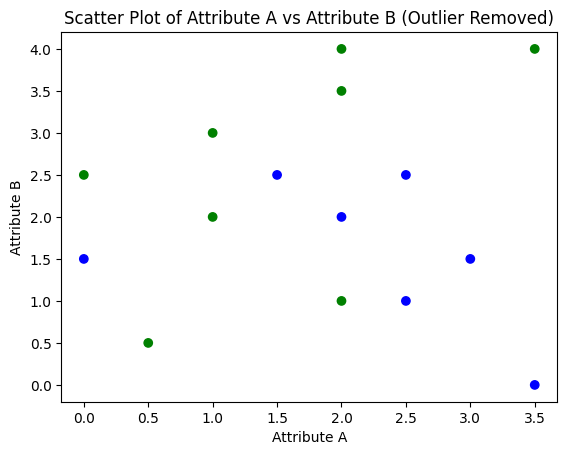

In [35]:
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())

plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot of Attribute A vs Attribute B (Outlier Removed)")

plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

There doesn't seem to be exceedly strange noise points, possibly point (0, 1.5) as it seems to be in the wrong classification

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

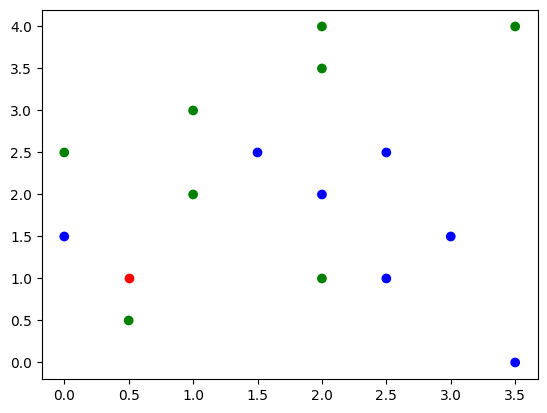

In [36]:
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])

# Add a new point with a different color
new_point = (0.5, 1)  # Coordinates of the new point
plt.scatter(new_point[0], new_point[1], color='r')


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

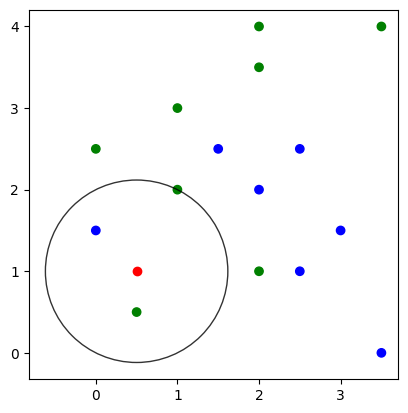

In [38]:
def n_closest_to(example, training_data, n):
    #adding another parameter for the cross one out validation
    dist_list = []
    for i in range(len(training_data["Attribute A"])):
        dist = np.linalg.norm(np.array(example) - np.array((training_data["Attribute A"][i], training_data["Attribute B"][i])))
        dist_list.append((dist, i))
        # Append the dist and index of the point
    dist_list.sort()
    # By default, the sorting is based on the first 
    # element of each tuple, which is the distance.
    return dist_list[:n]
    # return the first n results

    
location = (0.5, 1) # Coordinates of the point around which to draw the circle
n = 3  # Number of closest points to consider
closest_points = n_closest_to(location, data, n)
radius = closest_points[-1][0]  # Distance of the farthest point among the closest points
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])

# Add a new point with a different color
new_point = (0.5, 1)  # Coordinates of the new point
axes.scatter(new_point[0], new_point[1], color='r')

cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [39]:
def majority(points):
    classes = [data["Class"][x[1]] for x in points]
    
    zeroes = 0
    ones = 0
    for x in classes:
        if x == 0:
            zeroes+=1
        else:
            ones+=1
    
    if zeroes > ones:
        print("0")
        return 0
    else:
        print("1")
        return 1

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [40]:
count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    
    # Create the training set by excluding the current point
    if i == len(data["Class"]) - 1:
        training_data = {
            "Attribute A": data["Attribute A"][:i],
            "Attribute B": data["Attribute B"][:i],
            "Class": data["Class"][:i]
        }
    else:
        training_data = {
            "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i+1:],
            "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i+1:],
            "Class": data["Class"][:i] + data["Class"][i+1:]
        }
    
    # Get the coordinates of the current point
    point = (data["Attribute A"][i], data["Attribute B"][i])
    
    # Find the closest points in the training set
    closest_points = n_closest_to(point, training_data, n=3)
    
    # Predict the class of the current point using the majority function
    prediction = majority(closest_points)
    
    if prediction == actual_class:
        count += 1

accuracy = count / len(data["Class"])
print(f"Overall accuracy = {accuracy:.2f}")

0
0
1
1
0
1
1
1
1
1
1
0
0
1
1
Overall accuracy = 0.60


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Step 1: Loading the dataset and splitting it into training and testing sets
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Initializing lists to store the training and testing accuracies for different values of K

train_accuracies = []
test_accuracies = []

# Step 3: Iterating over different values of K (from 1 to 20)

for K in range(1, 21):
    # Create a KNN classifier with the current value of K
    knn = KNeighborsClassifier(n_neighbors=K)
    
    # Train the classifier on the training data
    knn.fit(Xtrain, ytrain)
    
    # Record the training accuracy
    train_accuracy = knn.score(Xtrain, ytrain)
    train_accuracies.append(train_accuracy)
    
    # Record the testing accuracy
    test_accuracy = knn.score(Xtest, ytest)
    test_accuracies.append(test_accuracy)


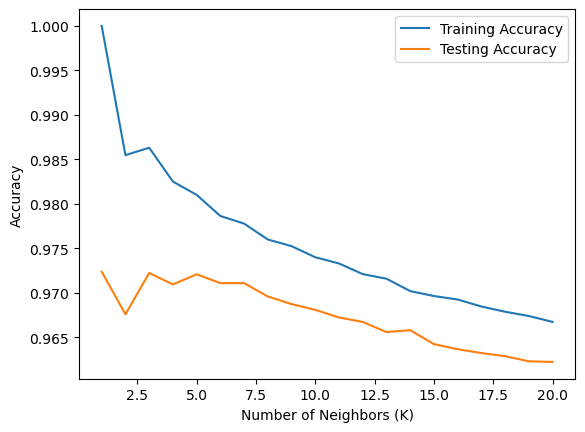

In [6]:
import matplotlib.pyplot as plt
# Step 4: Plotting the training and testing accuracies

plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The optimal K seems to be around 3 where the testing accuracy reaches its maximum, while 1 also seems like a good choice choosing that may be overfitting the model to the training data.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

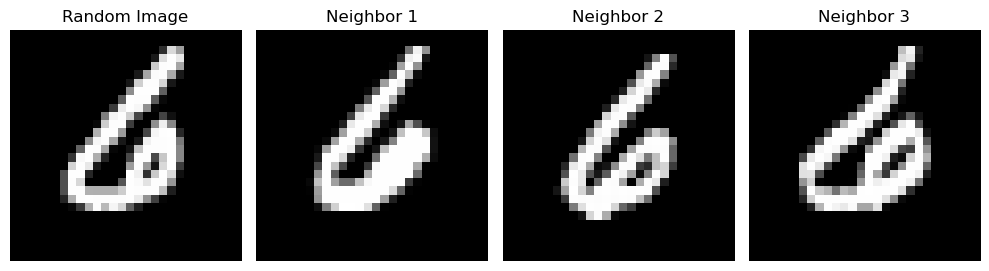

In [7]:
import random

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

random_index = random.randint(0, len(Xtest) - 1)
random_image = Xtest[random_index]

# get the distances and indicies of the k nearest numbers
distances, indices = knn.kneighbors([random_image])

# 4 plots for the 4 images
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

# Plot the randomly selected image
axes[0].imshow(random_image.reshape(28, 28), cmap='gray')
axes[0].set_title("Random Image")
axes[0].axis('off')

# Plot the K nearest neighbors
for i in range(3):
    neighbor_index = indices[0][i]
    neighbor_image = Xtrain[neighbor_index]
    axes[i+1].imshow(neighbor_image.reshape(28, 28), cmap='gray')
    axes[i+1].set_title(f"Neighbor {i+1}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

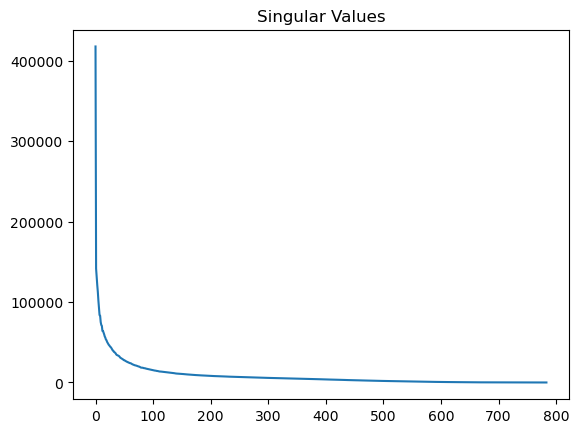

In [9]:
import numpy as np
from sklearn.pipeline import make_pipeline

# Fetching the data
data, labels  = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Perform SVD on the data
U, S, Vt = np.linalg.svd(data, full_matrices=False)

# Plotting singular values
plt.plot(S) 
plt.title("Singular Values")
plt.show()


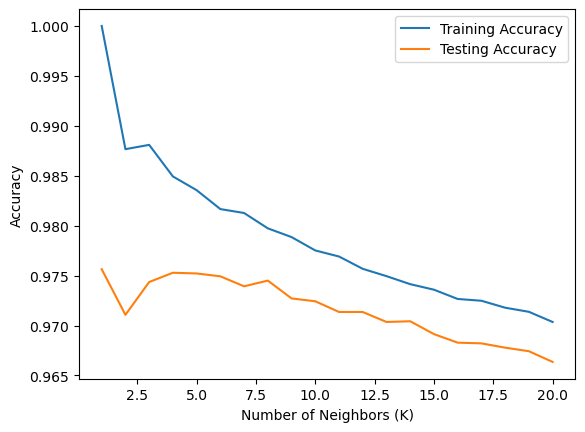

In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

# Specifying the desired fro number of components for SVD
n_components = 100

# Create the dimensionality reduction and KNN models
svd = TruncatedSVD(n_components=n_components)
knn = KNeighborsClassifier()

# Creating a pipeline that first reduces dimensionality then applies KNN
model = make_pipeline(svd, knn)

train_accuracies = []
test_accuracies = []

# Iterating over different values of K (from 1 to 20)
for K in range(1, 21):
    model.set_params(kneighborsclassifier__n_neighbors=K)
    model.fit(Xtrain, ytrain)

    # Record the training and testing accuracies
    train_accuracies.append(model.score(Xtrain, ytrain))
    test_accuracies.append(model.score(Xtest, ytest))

# Plotting the accuracies
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tbh there doesn't seem to be to much of a noticable difference. Both graphs seem to peak around 3/4 however the SVD'd data show what looks like a peak at around 8. Maybe because of the reduced noise in the data its able to make a better relationship.

here are some other noticable changes:

- the drop in accuracy as K increases seems less pronounced after applying SVD. could suggest that with a lower dim, the influence of each additional neighbor is not as strong as in higher dim space.

- there seems to be more stability across k values. This could indicate that the dimesnionality reduction has made the data more homogenous in some way.

- potentional peak shit at K = 8 in the SVD-reduced data. while its not definitive it suggests the relationship between nearest neighbors has changed slightly in the reduced space.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

All Explanations/Code in the other notebook + image of submission